In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Done importing")

Done importing


In [3]:
df = pd.read_csv("data/heart_disease_raw.csv")
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None


In [6]:
# Check descriptive statistics
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [9]:
# Check for the number of missing values in each columns
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [10]:
# Target distribution (binary: 0=healthy, 1-4=disease)
df["target"] = (df["target"] > 0).astype(int)
print(f"Class distribution:\n{df['target'].value_counts()}")

Class distribution:
target
0    164
1    139
Name: count, dtype: int64


Text(0.5, 1.0, 'Age Distribution by Heart Disease')

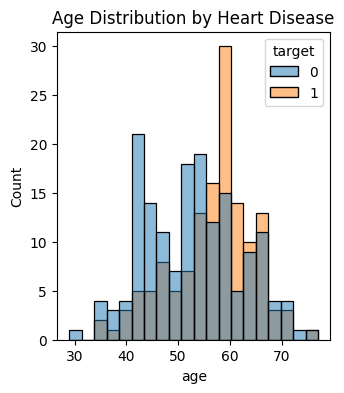

In [11]:
# Age distribution by disease status
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x="age", hue="target", bins=20)
plt.title("Age Distribution by Heart Disease")

Text(0.5, 1.0, 'Chest Pain Type vs Disease')

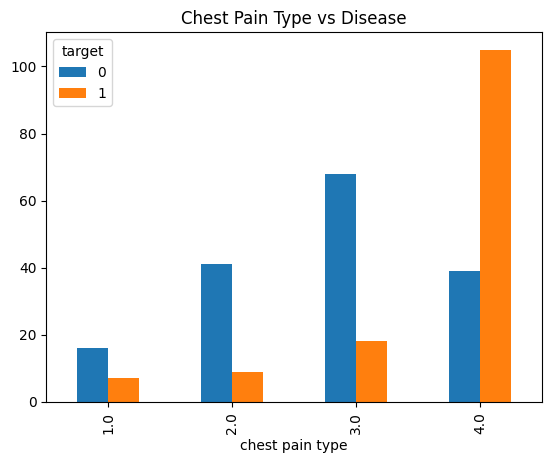

In [14]:
# Chest pain type vs disease
pd.crosstab(df["cp"], df["target"]).plot(kind="bar")
plt.xlabel("chest pain type")
plt.title("Chest Pain Type vs Disease")

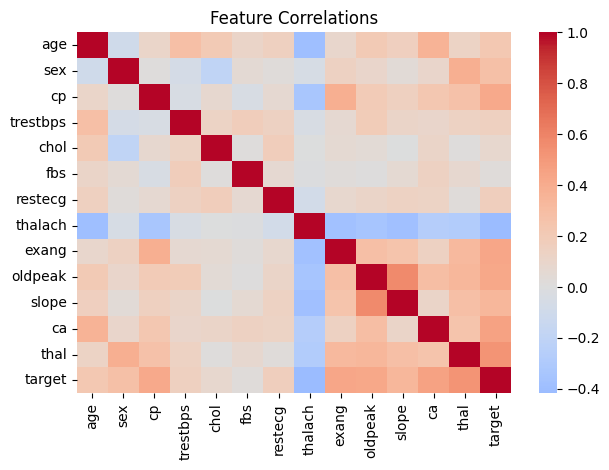

In [18]:
# Correlation heatmap
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlations")
plt.tight_layout()
plt.savefig("reports/eda_analysis.png")

In [19]:
df.to_csv("data/heart_disease.csv", index=False)